In [13]:
#Individual Homework 1
import pandas as pd
import requests
import io
import os

In [14]:
''' (START OF COMMENTING OUT - Attempted to use Classes but ran into several errors - will merge and clean data using regular fuctions instead.)
class WorldBankCleaning:
    def __init__(self,intermediate_folder="data/intermediate/", raw_folder="data/raw/"):
        self.intermediate_folder = intermediate_folder
        self.raw_folder = raw_folder
        self.ag_emp = None
        self.rural_growth = None
    
    def download_worldbank(indicator, countries, date_start, date_end):
        url_base = 'http://api.worldbank.org/v2/'  # Base URL for the World Bank API
        country_codes = ';'.join(countries)  # Combine country codes into a string
        url = url_base + f'country/{country_codes}/indicator/{indicator}?date={date_start}:{date_end}&per_page=30000' #create the url with start and end date.
        url = url_base + f'country/{country_codes}/indicator/{indicator}?per_page=30000' # This line overrides the previous one. It will ignore start/end date.

        response = requests.get(url)  # Download data from the URL
        df = pd.read_xml(response.content)  # Convert the downloaded data to a table
        return df  # Return the table
    
    def clean_wb(data):
        data = data.drop(["country","unit","decimal","obs_status","indicator"], axis=1)
        data = data.rename({"countryiso3code":'country',"date":'year'}, axis=1)
        return data
    
wb = WorldBankCleaning()
'''

' (START OF COMMENTING OUT - Attempted to use Classes but ran into several errors - will merge and clean data using regular fuctions instead.)\nclass WorldBankCleaning:\n    def __init__(self,intermediate_folder="data/intermediate/", raw_folder="data/raw/"):\n        self.intermediate_folder = intermediate_folder\n        self.raw_folder = raw_folder\n        self.ag_emp = None\n        self.rural_growth = None\n\n    def download_worldbank(indicator, countries, date_start, date_end):\n        url_base = \'http://api.worldbank.org/v2/\'  # Base URL for the World Bank API\n        country_codes = \';\'.join(countries)  # Combine country codes into a string\n        url = url_base + f\'country/{country_codes}/indicator/{indicator}?date={date_start}:{date_end}&per_page=30000\' #create the url with start and end date.\n        url = url_base + f\'country/{country_codes}/indicator/{indicator}?per_page=30000\' # This line overrides the previous one. It will ignore start/end date.\n\n        

In [15]:
''' ****************************************
*              FUNCTIONS                   *
*****************************************'''

def download_worldbank(indicator, countries, date_start, date_end):
    url_base = 'http://api.worldbank.org/v2/'  # Base URL for the World Bank API
    country_codes = ';'.join(countries)  # Combine country codes into a string
    url = url_base + f'country/{country_codes}/indicator/{indicator}?date={date_start}:{date_end}&per_page=30000' #create the url with start and end date.
    url = url_base + f'country/{country_codes}/indicator/{indicator}?per_page=30000' # This line overrides the previous one. It will ignore start/end date.

    response = requests.get(url)  # Download data from the URL
    df = pd.read_xml(response.content)  # Convert the downloaded data to a table
    return df  # Return the table

def clean_wb(data):
    data = data.drop(["country","unit","decimal","obs_status","indicator"], axis=1)
    data = data.rename({"countryiso3code":'country',"date":'year'}, axis=1)
    return data

def change_date(data):
    data.year = pd.PeriodIndex(data.year, freq = 'Q').to_timestamp()
    return data

In [16]:
#DOWNLOADING DATASETS
#Variables for Future: 'SL.AGR.EMPL.ZS','SP.RUR.TOTL.ZG','SI.POV.NAHC', 'SI.POV.GINI','IT.NET.SECR.P6','IT.CEL.SETS.P2','FP.CPI.TOTL','FX.OWN.TOTL.ZS','EG.ELC.ACCS.ZS','EG.ELC.ACCS.RU.ZS','BX.TRF.PWKR.DT.GD.ZS'
ag_emp = download_worldbank(
    indicator = 'SL.AGR.EMPL.ZS',
    countries = ['BGD', 'IND','VNM','LAO','IND','THA','KHM','MYS','SGP','MMR','PHL','BRN'],
    date_start = '2020',
    date_end = '2023'
)

rural_growth = download_worldbank(
    indicator = 'SP.RUR.TOTL.ZG',
    countries = ['BGD', 'IND','VNM','LAO','IND','THA','KHM','MYS','SGP','MMR','PHL','BRN'],
    date_start = '2021',
    date_end = '2023'
)


In [17]:
ag_emp = clean_wb(ag_emp)

ag_emp = ag_emp.rename({'value':"Employment in Agr. (percent of total employment)"},axis=1)

ag_emp.head()

rural_growth = clean_wb(rural_growth)
rural_growth = rural_growth.rename({'value':"Rural Pop. Growth (annual percent)"},axis=1)

rural_growth.head()

,country,year,Rural Pop. Growth (annual percent)
0,BGD,2024,NaN
1,BGD,2023,-0.050253
2,BGD,2022,-0.236671
3,BGD,2021,-0.436696
4,BGD,2020,-0.404684


In [18]:
rural_growth = change_date(rural_growth)
ag_emp = change_date(ag_emp)

In [19]:
# (Checking Results)
rural_growth.year.dtype

rural_growth.head()

,country,year,Rural Pop. Growth (annual percent)
0,BGD,2024-01-01,NaN
1,BGD,2023-01-01,-0.050253
2,BGD,2022-01-01,-0.236671
3,BGD,2021-01-01,-0.436696
4,BGD,2020-01-01,-0.404684


In [20]:
ag_emp = ag_emp.set_index(['country','year'])
ag_emp.head()

rural_growth = rural_growth.set_index(['country','year'])
rural_growth.head()

Rural Pop. Growth (annual percent)
country year                                          
BGD     2024-01-01                                 NaN
        2023-01-01                           -0.050253
        2022-01-01                           -0.236671
        2021-01-01                           -0.436696
        2020-01-01                           -0.404684

In [21]:
wb_merged = pd.merge(
    rural_growth,
    ag_emp,
    right_index= True,
    left_index = True,
    how = 'inner'
)

wb_merged.head()

Rural Pop. Growth (annual percent)  \
country year                                             
BGD     2024-01-01                                 NaN   
        2023-01-01                           -0.050253   
        2022-01-01                           -0.236671   
        2021-01-01                           -0.436696   
        2020-01-01                           -0.404684   

                    Employment in Agr. (percent of total employment)  
country year                                                          
BGD     2024-01-01                                               NaN  
        2023-01-01                                         35.274072  
        2022-01-01                                         35.662164  
        2021-01-01                                         37.306117  
        2020-01-01                                         37.971569

In [22]:
wb_merged.describe()

wb_merged.query("country == 'IND' & year>2010").describe()

,Rural Pop. Growth (annual percent),Employment in Agr. (percent of total employment)
count,13.000000,13.000000
mean,0.488041,44.180756
std,0.291937,2.332125
min,0.046033,40.651814
25%,0.278194,42.860998
50%,0.534851,44.079193
75%,0.699396,45.188960
max,0.914628,49.086034


In [23]:
wb_merged.query("country == 'IND' & year<2010").describe()

,Rural Pop. Growth (annual percent),Employment in Agr. (percent of total employment)
count,49.000000,19.000000
mean,1.767210,58.726094
std,0.321252,3.832989
min,0.952529,51.922143
25%,1.677690,55.501326
50%,1.873208,59.644730
75%,1.934056,62.076301
max,2.264756,63.358955


<Axes: xlabel='year', ylabel='Rural Pop. Growth (annual percent)'>

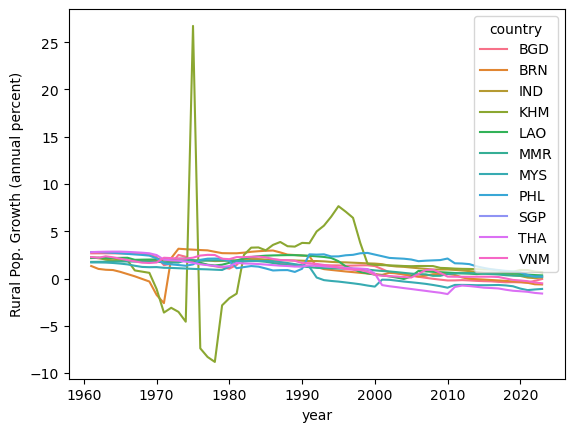

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importing plt explicitly for clarity

sns.lineplot(
    data = wb_merged,      # Dataframe with long format data
    x = 'year',                   # Column for x-axis (dates)
    y = 'Rural Pop. Growth (annual percent)',         # Column for y-axis (GDP values)
    hue = 'country'               # Column for color differentiation (countries)
)

<Axes: xlabel='year', ylabel='Employment in Agr. (percent of total employment)'>

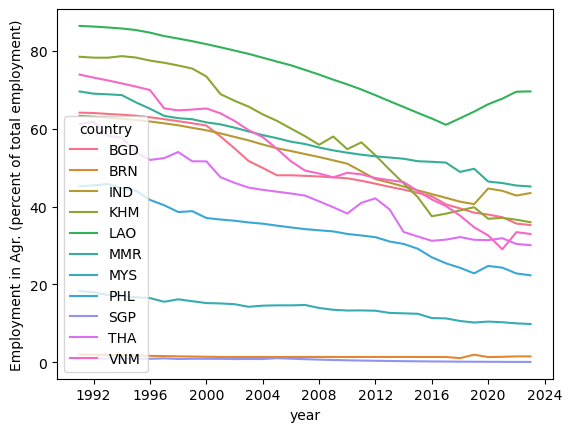

In [25]:
sns.lineplot(
    data = wb_merged,      # Dataframe with long format data
    x = 'year',                   # Column for x-axis (dates)
    y = 'Employment in Agr. (percent of total employment)',         # Column for y-axis (GDP values)
    hue = 'country'               # Column for color differentiation (countries)
)